In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sk

In [318]:
# melted_undf = pd.melt(unemployment_df, id_vars=['Country Name', 'Series Name'],var_name='Year', value_name='Percentage Value')

# pattern = r'(\d{4})'

# melted_undf['Year'] = melted_undf['Year'].str.extract(pattern, expand=False)

# # unemployment_df = melted_undf.set_index(['Country Name', 'Series Name', 'Year'])

# melted_undf

In [319]:
# unemployment_df.T

In [420]:
raw_wbdata = pd.read_csv('./Data/API_19_DS2_en_csv_v2_6183479.csv', skiprows=3)
raw_wbdata.drop('Unnamed: 67', axis=1, inplace=True)
raw_wbdata.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,106445.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392


In [421]:
raw_wbdata.set_index(['Country Code', 'Indicator Code'], inplace=True)

In [708]:
carbon_emission = raw_wbdata.xs('SP.POP.TOTL', level='Indicator Code').dropna(axis=1, thresh=10)
carbon_emission = carbon_emission.drop(['Indicator Name', 'Country Name'], axis=1)
countries = ['DEU', 'FRA', 'GBR', 'ITA']
selected_countries = carbon_emission.loc[countries]

<Figure size 432x288 with 0 Axes>

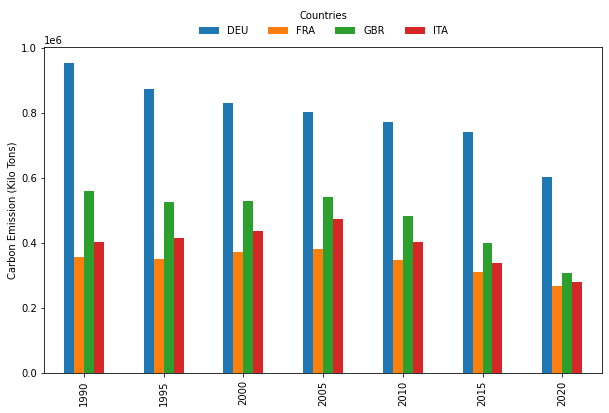

<Figure size 432x288 with 0 Axes>

In [707]:
plt.figure()

selected_countries_transposed = selected_countries.T
data_20years = selected_countries_transposed.iloc[0::5,:]

data_20years.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Carbon Emission (Kilo Tons)')
plt.legend(
    title='Countries',
    loc='upper center',
    frameon=False,
    ncol=5,
    borderaxespad=-4
)

plt.show()
# plt.savefig('Carbon Emission.jpg')

<Figure size 432x288 with 0 Axes>

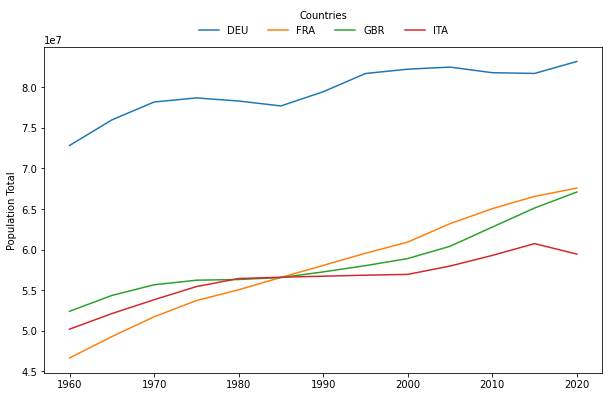

<Figure size 432x288 with 0 Axes>

In [709]:
plt.figure()

selected_countries_transposed = selected_countries.T
data_20years = selected_countries_transposed.iloc[0::5,:]

data_20years.plot(kind='line', figsize=(10, 6))

plt.ylabel('Population Total')
plt.legend(
    title='Countries',
    loc='upper center',
    frameon=False,
    ncol=5,
    borderaxespad=-4
)

plt.show()
plt.savefig('Population.jpg')

In [553]:
data_20years.reset_index()

Country Code,index,DEU,FRA,GBR,ITA
0,1990,955307.7,356297.9,561774.5,405262.0
1,1995,874659.4,352283.1,526808.2,416415.0
2,2000,830284.1,373235.8,530888.2,436296.6
3,2005,802383.2,380816.1,540917.0,473831.8
4,2010,773069.1,347940.1,482646.2,405272.3
5,2015,742314.4,311175.4,401075.3,337862.1
6,2020,603350.5,267154.7,308650.3,281286.8


In [610]:
raw_wbdata_test = raw_wbdata.T
raw_wbdata_test.columns.name = None
raw_wbdata_test

Country Code                                         ABW                    \
Indicator Code                         SP.URB.TOTL.IN.ZS       SP.URB.TOTL   
Country Name                                       Aruba             Aruba   
Indicator Name  Urban population (% of total population)  Urban population   
1960                                              50.776           27728.0   
1961                                              50.761           28330.0   
1962                                              50.746           28764.0   
...                                                  ...               ...   
2018                                              43.411           45999.0   
2019                                              43.546           46351.0   
2020                                              43.697           46574.0   
2021                                              43.866           46734.0   
2022                                              44.052           46891.0   

Country Code                                                           \
Indicator Code                         SP.URB.GROW        SP.POP.TOTL   
Country Name                                 Aruba              Aruba   
Indicator Name  Urban population growth (annual %)  Population, total   
1960                                           NaN            54608.0   
1961                                      2.147858            55811.0   
1962                                      1.520329            56682.0   
...                                            ...                ...   
2018                                      0.765986           105962.0   
2019                                      0.762321           106442.0   
2020                                      0.479958           106585.0   
2021                                      0.342951           106537.0   
2022                                      0.335381           106445.0   

Country Code                                  \
Indicator Code                   SP.POP.GROW   
Country Name                           Aruba   
Indicator Name  Population growth (annual %)   
1960                                     NaN   
1961                                2.179059   
1962                                1.548572   
...                                      ...   
2018                                0.494795   
2019                                 0.45197   
2020                                0.134255   
2021                               -0.045045   
2022                               -0.086392   

Country Code                                                       \
Indicator Code                                        SI.POV.DDAY   
Country Name                                                Aruba   
Indicator Name  Poverty headcount ratio at $2.15 a day (2017 P...   
1960                                                          NaN   
1961                                                          NaN   
1962                                                          NaN   
...                                                           ...   
2018                                                          NaN   
2019                                                          NaN   
2020                                                          NaN   
2021                                                          NaN   
2022                                                          NaN   

Country Code                                                       \
Indicator Code                                     SH.STA.MALN.ZS   
Country Name                                                Aruba   
Indicator Name  Prevalence of underweight, weight for age (% o...   
1960                                                          NaN   
1961                                                          NaN   
1962                                                          NaN   
...                          

In [556]:
filename = './Data/API_19_DS2_en_csv_v2_6183479.csv'

def read_and_transpose_data(filename):
    # Read data from World Bank
    read_data = pd.read_csv(filename, skiprows=3)

    # Assuming you want to filter data related to 'Urban population' indicator
    transpose_data = pd.DataFrame(read_data).transpose()
    cleaned_data = transpose_data.dropna(axis=1,thresh=10)
    indicator_col = cleaned_data.loc['Indicator Name']
    countries_col = cleaned_data.loc['Country Name']
   
    
    cleaned_data = cleaned_data.fillna(1)
   
    years = cleaned_data.copy()
    years_column  = years.iloc[4:]
    
    
    
    
   
    return years_column, indicator_col , countries_col , cleaned_data.transpose()

df_years, indicator_index, country_index, cleaned_data = read_and_transpose_data(filename)

,0,1,2,3,4,9,10,11,14,15,...,20200,20201,20202,20203,20204,20206,20207,20213,20214,20215
1960,50.776,27728.0,1,54608.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1961,50.761,28330.0,2.147858,55811.0,2.179059,1,1,1,1,1,...,1,1,1,919.7,657.0,1,1,4.87269,28.396019,109850.0
1962,50.746,28764.0,1.520329,56682.0,1.548572,1,1,1,1,1,...,1,1,1,905.9,657.0,1,1,5.001939,28.615743,110700.0
1963,50.73,29157.0,1.357042,57475.0,1.389337,1,1,1,1,1,...,1,1,1,822.5,657.0,1,1,5.131188,28.835466,111550.0
1964,50.715,29505.0,1.186472,58178.0,1.215721,1,1,1,1,1,...,1,1,1,820.5,657.0,1,1,5.260437,29.055189,112400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,43.546,46351.0,0.762321,106442.0,0.45197,1,1,0.027573,0.141164,0.000105,...,1,46.682095,1.142806,748.0,657.0,45.213002,174906.5,10.339925,41.876696,162000.0
2020,43.697,46574.0,0.479958,106585.0,0.134255,1,1,1,0.141164,0.000105,...,1,52.747667,0.699034,1148.6,657.0,45.093912,174445.8,10.339925,41.876696,162000.0
2021,43.866,46734.0,0.342951,106537.0,-0.045045,1,1,1,0.141164,0.000105,...,1,48.979927,0.881174,1545.2,1,44.974822,173985.1,10.339925,41.876696,162000.0
2022,44.052,46891.0,0.335381,106445.0,-0.086392,1,1,1,0.141164,0.000105,...,1,1,1.651509,1,1,1,1,1,1,1


In [557]:
df_years

,0,1,2,3,4,9,10,11,14,15,...,20200,20201,20202,20203,20204,20206,20207,20213,20214,20215
1960,50.776,27728.0,1,54608.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1961,50.761,28330.0,2.147858,55811.0,2.179059,1,1,1,1,1,...,1,1,1,919.7,657.0,1,1,4.87269,28.396019,109850.0
1962,50.746,28764.0,1.520329,56682.0,1.548572,1,1,1,1,1,...,1,1,1,905.9,657.0,1,1,5.001939,28.615743,110700.0
1963,50.73,29157.0,1.357042,57475.0,1.389337,1,1,1,1,1,...,1,1,1,822.5,657.0,1,1,5.131188,28.835466,111550.0
1964,50.715,29505.0,1.186472,58178.0,1.215721,1,1,1,1,1,...,1,1,1,820.5,657.0,1,1,5.260437,29.055189,112400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,43.546,46351.0,0.762321,106442.0,0.45197,1,1,0.027573,0.141164,0.000105,...,1,46.682095,1.142806,748.0,657.0,45.213002,174906.5,10.339925,41.876696,162000.0
2020,43.697,46574.0,0.479958,106585.0,0.134255,1,1,1,0.141164,0.000105,...,1,52.747667,0.699034,1148.6,657.0,45.093912,174445.8,10.339925,41.876696,162000.0
2021,43.866,46734.0,0.342951,106537.0,-0.045045,1,1,1,0.141164,0.000105,...,1,48.979927,0.881174,1545.2,1,44.974822,173985.1,10.339925,41.876696,162000.0
2022,44.052,46891.0,0.335381,106445.0,-0.086392,1,1,1,0.141164,0.000105,...,1,1,1.651509,1,1,1,1,1,1,1


In [560]:
cleaned_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761,50.746,50.73,50.715,50.7,...,43.041,43.108,43.192,43.293,43.411,43.546,43.697,43.866,44.052,1
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.0,28330.0,28764.0,29157.0,29505.0,29802.0,...,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0,1
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,1,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381,1
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,1
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.691615,0.637959,0.590062,0.537296,0.494795,0.45197,0.134255,-0.045045,-0.086392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20206,Zimbabwe,ZWE,Forest area (% of land area),AG.LND.FRST.ZS,1,1,1,1,1,1,...,45.808453,45.689363,45.570273,45.451183,45.332093,45.213002,45.093912,44.974822,1,1
20207,Zimbabwe,ZWE,Forest area (sq. km),AG.LND.FRST.K2,1,1,1,1,1,1,...,177210.0,176749.3,176288.6,175827.9,175367.2,174906.5,174445.8,173985.1,1,1
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,1,4.87269,5.001939,5.131188,5.260437,5.337986,...,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,1,1
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,1,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,1,1


In [611]:
raw_wbdata_test.dtypes

Country Code  Indicator Code   
ABW           SP.URB.TOTL.IN.ZS    object
              SP.URB.TOTL          object
              SP.URB.GROW          object
              SP.POP.TOTL          object
              SP.POP.GROW          object
                                    ...  
ZWE           AG.LND.EL5M.RU.ZS    object
              AG.LND.EL5M.RU.K2    object
              AG.LND.ARBL.ZS       object
              AG.LND.AGRI.ZS       object
              AG.LND.AGRI.K2       object
Length: 20216, dtype: object

In [634]:
df_pak_yrs = raw_wbdata_test['PAK']
df_pak_ctr = raw_wbdata.xs('PAK', level='Country Code')
df_pak_ctr.iloc[1::5,3:]
df_pkyrs = df_pak_yrs.T.reset_index()
df_pkyrs = df_pkyrs.drop(['Indicator Code', 'Country Name'], axis=1)
pivot_pk = df_pkyrs.pivot_table(columns='Indicator Name', values=['1961','1970','1980','1990','2000','2010','2020'], aggfunc=np.mean)
pivot_pk.corr()

Indicator Name,Access to electricity (% of population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Average precipitation in depth (mm per year),CO2 emissions (kg per 2015 US$ of GDP),...,Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions (% change from 1990),Total greenhouse gas emissions (kt of CO2 equivalent),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population,Urban population (% of total population),Urban population growth (annual %),Urban population living in areas where elevation is below 5 meters (% of total population)
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),1.000000,-1.0,-0.167400,-0.167400,-0.999011,0.995509,0.995509,-0.240217,NaN,-0.960490,...,NaN,NaN,1.0,0.968751,NaN,NaN,0.985595,0.979254,-0.999878,NaN
Agricultural irrigated land (% of total agricultural land),-1.000000,1.0,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,NaN,1.000000,...,NaN,NaN,NaN,-1.000000,NaN,NaN,-1.000000,-1.000000,1.000000,NaN
Agricultural land (% of land area),-0.167400,-1.0,1.000000,1.000000,-0.140007,-0.130227,-0.130227,0.945352,NaN,0.142162,...,NaN,NaN,-1.0,0.469911,1.0,1.0,0.057955,0.106482,0.314867,-1.0
Agricultural land (sq. km),-0.167400,-1.0,1.000000,1.000000,-0.140007,-0.130227,-0.130227,0.945352,NaN,0.142162,...,NaN,NaN,-1.0,0.469911,1.0,1.0,0.057955,0.106482,0.314867,-1.0
"Agriculture, forestry, and fishing, value added (% of GDP)",-0.999011,1.0,-0.140007,-0.140007,1.000000,-0.599070,-0.599070,0.127933,NaN,0.948435,...,NaN,NaN,-1.0,-0.555740,1.0,1.0,-0.764839,-0.890490,0.356759,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Urban land area where elevation is below 5 meters (sq. km),NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,...,NaN,NaN,NaN,1.000000,1.0,1.0,1.000000,1.000000,-1.000000,-1.0
Urban population,0.985595,-1.0,0.057955,0.057955,-0.764839,0.975420,0.975420,-0.260007,NaN,-0.297638,...,NaN,NaN,1.0,0.995925,1.0,1.0,1.000000,0.969632,-0.807588,-1.0
Urban population (% of total population),0.979254,-1.0,0.106482,0.106482,-0.890490,0.967629,0.967629,-0.216246,NaN,-0.254089,...,NaN,NaN,1.0,0.992377,1.0,1.0,0.969632,1.000000,-0.676634,-1.0


In [343]:
raw_wbdata['Indicator Name']

Country Code  Indicator Code   
ABW           SP.URB.TOTL.IN.ZS             Urban population (% of total population)
              SP.URB.TOTL                                           Urban population
              SP.URB.GROW                         Urban population growth (annual %)
              SP.POP.TOTL                                          Population, total
              SP.POP.GROW                               Population growth (annual %)
                                                         ...                        
ZWE           AG.LND.EL5M.RU.ZS    Rural land area where elevation is below 5 met...
              AG.LND.EL5M.RU.K2    Rural land area where elevation is below 5 met...
              AG.LND.ARBL.ZS                            Arable land (% of land area)
              AG.LND.AGRI.ZS                      Agricultural land (% of land area)
              AG.LND.AGRI.K2                              Agricultural land (sq. km)
Name: Indicator Name, Length: 202

<Axes: xlabel='Indicator Name', ylabel='Indicator Name'>

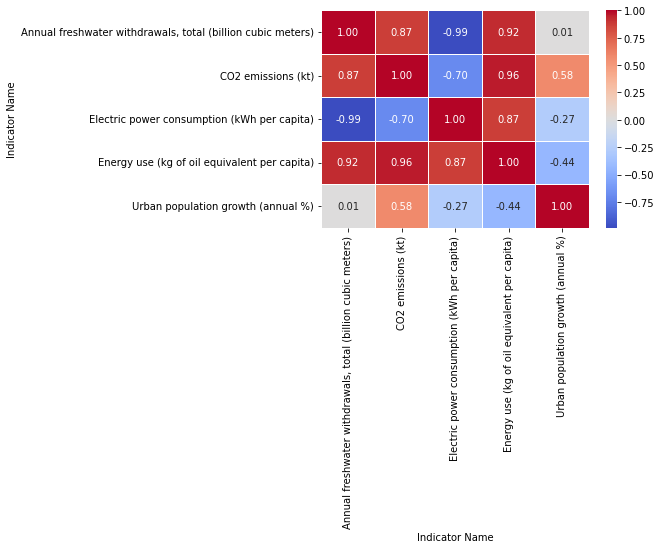

In [696]:
indicator_names = ['Electric power consumption (kWh per capita)',
'Energy use (kg of oil equivalent per capita)',
'Annual freshwater withdrawals, total (billion cubic meters)',
'Urban population growth (annual %)', 'CO2 emissions (kt)']
country_name = ['Germany']

years_data = ['1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015','2020']

ger_set = raw_wbdata_test['DEU']
ger_set = ger_set.T.reset_index()
ger_set = ger_set[ger_set['Indicator Name'].isin(indicator_names)]
ger_pivot = ger_set.pivot_table(columns='Indicator Name', values=years_data, aggfunc=np.mean)

sns.heatmap(ger_pivot.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


In [697]:
ger_pivot.describe()

Indicator Name,"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kt),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Urban population growth (annual %)
count,6.000000,7.000000,11.000000,12.000000,12.000000
mean,35.610795,797338.342857,5328.229569,3822.787341,0.352439
std,10.152178,110522.735809,1982.976050,819.082337,0.478351
min,24.443000,603350.500000,1586.749415,1952.588632,-0.542054
25%,26.800500,757691.750000,4289.061620,3850.036056,0.160989
50%,35.383135,802383.200000,6327.709754,4041.791414,0.348826
75%,43.109526,852471.750000,6637.576549,4195.107844,0.655494
max,48.830886,955307.700000,7264.322591,4598.138495,1.056365


In [698]:
ger_pivot.median()

Indicator Name
Annual freshwater withdrawals, total (billion cubic meters)        35.383135
CO2 emissions (kt)                                             802383.200000
Electric power consumption (kWh per capita)                      6327.709754
Energy use (kg of oil equivalent per capita)                     4041.791414
Urban population growth (annual %)                                  0.348826
dtype: float64

In [699]:
ger_pivot.std()

Indicator Name
Annual freshwater withdrawals, total (billion cubic meters)        10.152178
CO2 emissions (kt)                                             110522.735809
Electric power consumption (kWh per capita)                      1982.976050
Energy use (kg of oil equivalent per capita)                      819.082337
Urban population growth (annual %)                                  0.478351
dtype: float64